In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\angge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\angge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [197]:
# Cargar el archivo CSV
csv_data = pd.read_csv(r'C:\Users\angge\OneDrive\Documentos\GitHub\SS2_Practicas_201901055\Practica 2\Datos.csv')

# Cargar el archivo TXT
with open(r'C:\Users\angge\OneDrive\Documentos\GitHub\SS2_Practicas_201901055\Practica 2\Coursera Comments.txt', 'r', encoding='utf-8') as file:
    text_data = file.read()

In [198]:
#print("Nombres de columnas originales:", csv_data.columns)

# Limpiar los nombres de las columnas eliminando espacios en blanco
csv_data.columns = csv_data.columns.str.strip()
#print("Nombres de columnas después de limpieza:", csv_data.columns)

# Eliminar filas con valores nulos
csv_data.dropna(inplace=True)

#print("Nombres de las columnas originales:")
#print(csv_data.columns)

# Eliminar espacios en blanco de los nombres de las columnas
csv_data.columns = csv_data.columns.str.strip()

In [199]:
# Calcular el promedio de calificaciones para cada curso
average_ratings = csv_data.groupby('Course Title')['Rating'].mean().reset_index()
print("Promedio de calificaciones por curso:")
print(average_ratings)

Promedio de calificaciones por curso:
                                           Course Title  Rating
0      Assisting Public Sector Decision Makers With ...     4.8
1      Comercio, Inmigración y Tipos de Cambio en un...     4.9
2      FPGA computing systems: Background knowledge ...     4.6
3                      Future Healthcare Payment Models     4.5
4      IBM and ISC2 Cybersecurity Specialist Profess...     4.8
...                                                 ...     ...
2108                          لغة الجسد | Body Language     4.5
2109  ما هي الإدارة ولماذا نحتاج إليها |What and Why...     4.9
2110    مهارات إدارة المواهب | Talent Management Skills     4.9
2111     مهارات تنشيط الذاكرة | Memory Enhancing Skills     4.9
2112                                         파이썬 단기집중과정     4.7

[2113 rows x 2 columns]


In [200]:
# Calcular cursos con mayor y menor rating
highest_rated_course = csv_data.loc[csv_data['Rating'].idxmax()]
lowest_rated_course = csv_data.loc[csv_data['Rating'].idxmin()]
print("Curso con mayor calificación:", highest_rated_course)
print("Curso con menor calificación:", lowest_rated_course)

Curso con mayor calificación: Course Title                    El Holocausto: el abismo de la humanidad
Rating                                                               5.0
Level                                                     Beginner level
Duration                                    Approx. 21 hours to complete
Schedule                                               Flexible schedule
Review                                                        28 reviews
What you will learn    Ahondaremos en la vida de los judíos entreguer...
Skill gain                                                            []
Modules                ['La vida judía antes del Holocausto y el asce...
Instructor                                     ['Sandra Rosenfeld Katz']
Offered By                                               ['Yad Vashem ']
Keyword                                              Arts and Humanities
Course Url                  https://www.coursera.org/learn/el-holocausto
Name: 362, dtype: obj

In [201]:
# Calcular el porcentaje de cursos con horario flexible
flexible_courses = csv_data[csv_data['Schedule'] == 'Flexible schedule']
flexible_percentage = (len(flexible_courses) / len(csv_data)) * 100
print(f"Porcentaje de cursos con horario flexible: {flexible_percentage:.2f}%")

Porcentaje de cursos con horario flexible: 100.00%


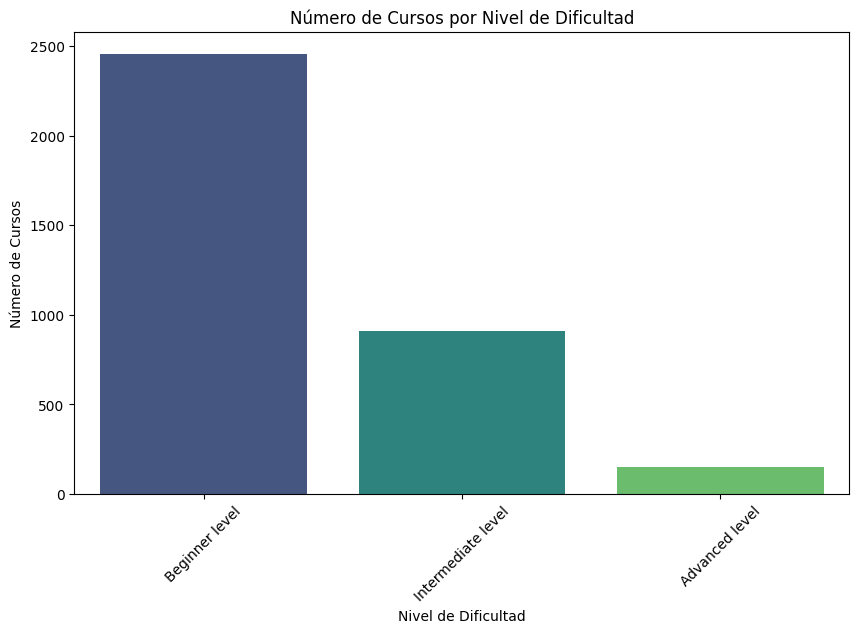

In [202]:
# Gráfica de barras que muestra el número de cursos en cada nivel de dificultad
plt.figure(figsize=(10, 6))
sns.countplot(data=csv_data, x='Level', palette='viridis', hue='Level', legend=False)
plt.title('Número de Cursos por Nivel de Dificultad')
plt.xlabel('Nivel de Dificultad')
plt.ylabel('Número de Cursos')
plt.xticks(rotation=45)
plt.show()

C:\Users\angge\AppData\Local\Temp\ipykernel_27548\321704467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


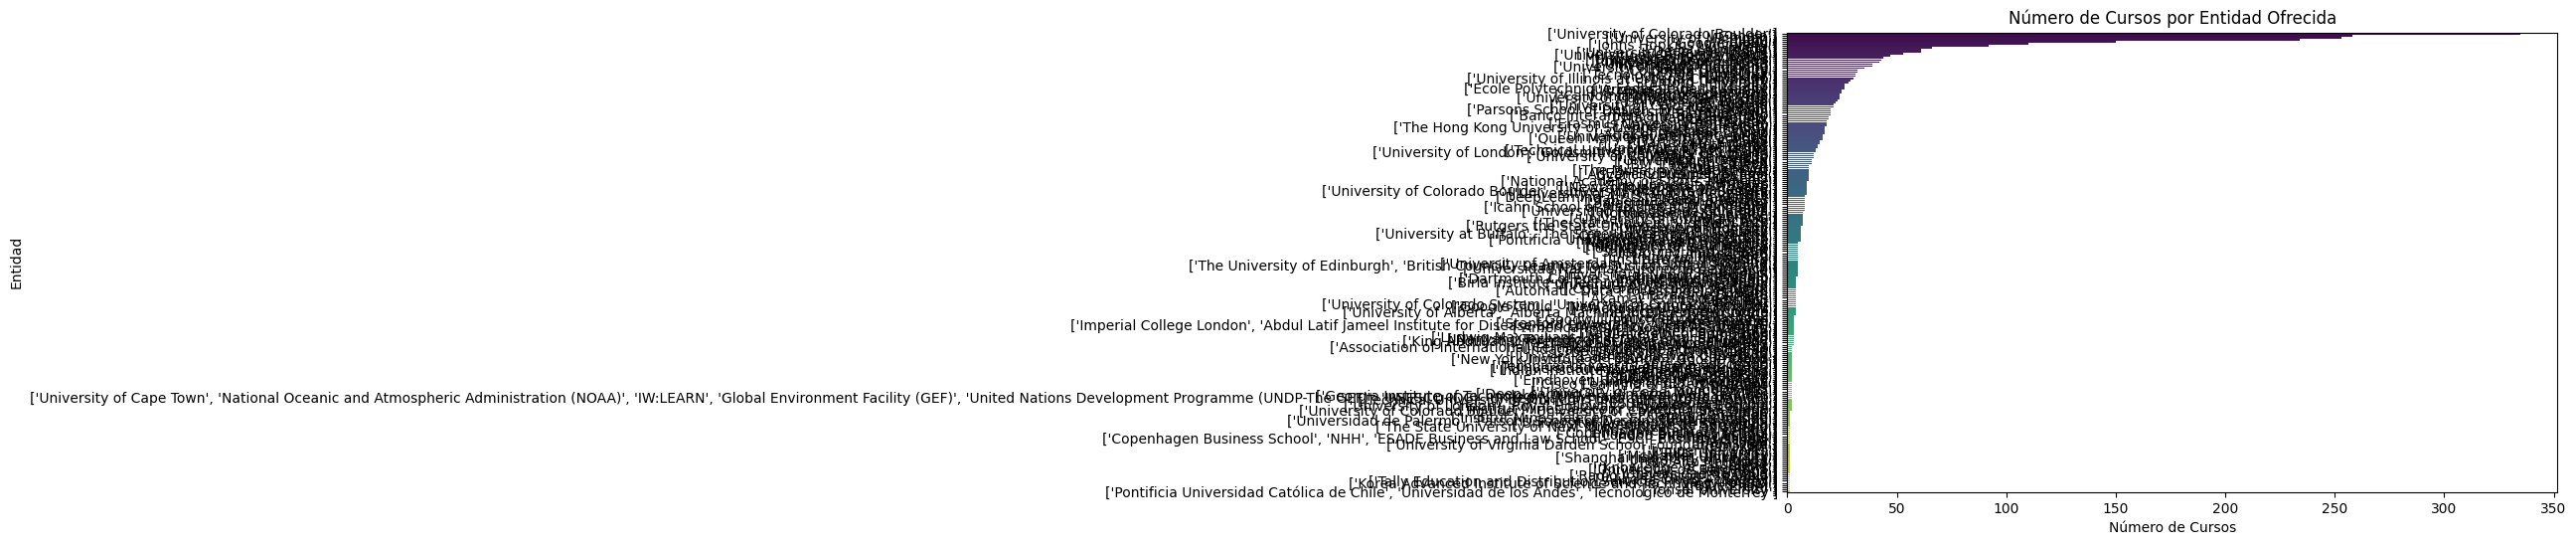

In [203]:
# Gráfica de barras horizontal que muestra el número de cursos en las principales categorías
plt.figure(figsize=(10, 6))
category_counts = csv_data['Offered By'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Número de Cursos por Entidad Ofrecida')
plt.xlabel('Número de Cursos')
plt.ylabel('Entidad')
plt.show()

In [204]:
# Tokenización
tokens = word_tokenize(text_data)

# Eliminación de palabras vacías
stop_words = set(stopwords.words('spanish'))
filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

# Frecuencia de palabras
word_freq = pd.Series(filtered_tokens).value_counts()
print("Frecuencia de palabras:")
print(word_freq)

Frecuencia de palabras:
curso            1297
Semana            843
TA                835
participantes     822
semana            780
                 ... 
especificaron       1
cayendo             1
Pedir               1
Estuvieron          1
Leo                 1
Name: count, Length: 13797, dtype: int64


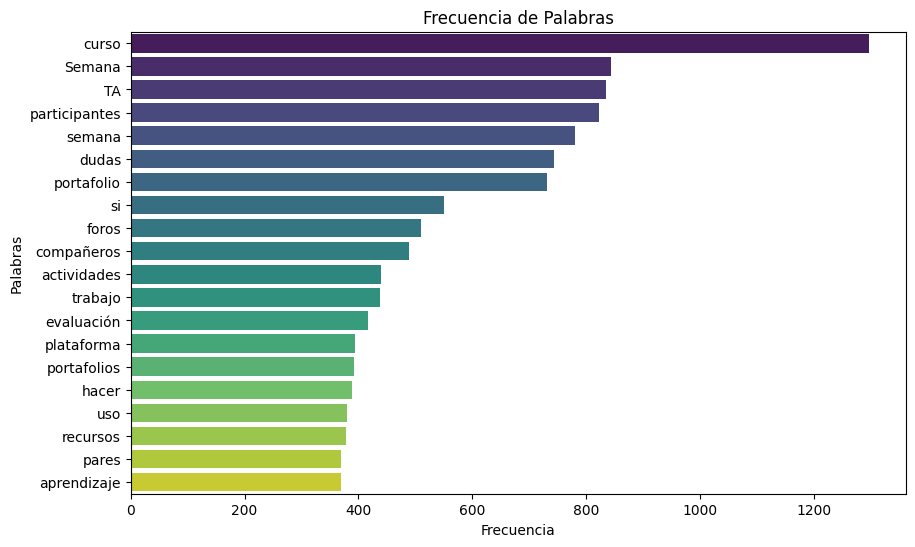

In [205]:
# Generar la gráfica de frecuencia de palabras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index, hue=top_words.index, palette='viridis', legend=False)
plt.title('Frecuencia de Palabras')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()

In [206]:
# Lematización
lemmatizer = WordNetLemmatizer()
words = word_tokenize(text_data)
lemmas = [lemmatizer.lemmatize(word) for word in filtered_tokens] 

# Frecuencia de lemas
lemma_freq = pd.Series(lemmas).value_counts()
print("Frecuencia de lemas:")
print(lemma_freq)

Frecuencia de lemas:
curso            1297
Semana            843
TA                835
participantes     822
semana            780
                 ... 
Aportar             1
Aplicarlos          1
diseños             1
aplicados           1
abordada            1
Name: count, Length: 13720, dtype: int64


In [207]:
positive_words = ['bueno', 'excelente', 'fantástico', 'maravilloso', 'agradable', 'positivo']
negative_words = ['malo', 'horrible', 'terrible', 'desagradable', 'negativo']

# Tokenizar el texto
tokens = word_tokenize(text_data.lower())  # Convertir a minúsculas

# Contar las palabras positivas y negativas
positive_count = sum(1 for word in tokens if word in positive_words)
negative_count = sum(1 for word in tokens if word in negative_words)

# Calcular polaridad y subjetividad
polarity = (positive_count - negative_count) / (positive_count + negative_count + 1)  
subjectivity = (positive_count + negative_count) / len(tokens) if len(tokens) > 0 else 0

print(f"Análisis de sentimientos:\nPolaridad: {polarity*100}%\nSubjetividad: {subjectivity*100}%")


Análisis de sentimientos:
Polaridad: 92.578125%
Subjetividad: 0.12460906958561375%


In [210]:
# 19. Reconocimiento de entidades nombradas
max_length = 1000000
text_length = len(text_data)
entities = []
for start in range(0, text_length, max_length):
    end = min(start + max_length, text_length)
    doc = nlp(text_data[start:end])
    entities += [(ent.text, ent.label_) for ent in doc.ents]

print("Entidades reconocidas:")
print(entities)

Entidades reconocidas:
[('Vargas Pérez', 'PER'), ('PT\nValorada', 'MISC'), ('Escandalizada', 'LOC'), ('Escandalizada', 'PER'), ('Estoy en coursera', 'MISC'), ('Meta', 'LOC'), ('Coursera Plus', 'PER'), ('Duré', 'MISC'), ('Ya llevo', 'MISC'), ('Quizás', 'MISC'), ('En fin... Yo sí recomiendo coursera', 'MISC'), ('Fecha', 'MISC'), ('Richard\n1', 'MISC'), ('ES\nValorada', 'MISC'), ('Velocidad', 'MISC'), ('Fecha', 'MISC'), ('MX\nValorada', 'MISC'), ('Fecha', 'MISC'), ('Ana\n1', 'MISC'), ('ES\nValorada', 'MISC'), ('ESTAFADORES!!', 'MISC'), ('Coursera Plus', 'PER'), ('Fecha', 'MISC'), ('Airin', 'MISC'), ('ES\nValorada', 'MISC'), ('ESTAFADORES', 'ORG'), ('No hay forma de comunicarse', 'MISC'), ('Fecha', 'MISC'), ('Maria Eugenia Simancas Soriano', 'PER'), ('US', 'LOC'), ('Cuidado', 'MISC'), ('Coursera!!', 'MISC'), ('Cuidado', 'MISC'), ('Coursera!!!\n', 'MISC'), ('Son unos estafadores', 'MISC'), ('Además', 'PER'), ('Fecha', 'MISC'), ('Indira Izurieta', 'MISC'), ('US\nValorada', 'ORG'), ('Courser 

In [209]:
# 20. Crear un DataFrame para las entidades
entities_df = pd.DataFrame(entities, columns=['Entidad', 'Etiqueta'])
print(entities_df)

                    Entidad Etiqueta
0              Vargas Pérez      PER
1              PT\nValorada     MISC
2             Escandalizada      LOC
3             Escandalizada      PER
4         Estoy en coursera     MISC
...                     ...      ...
9369  etc.\tDefinitivamente      PER
9370               Semana 4     MISC
9371                 MIGUEL     MISC
9372                  ANGEL     MISC
9373               Semana 1     MISC

[9374 rows x 2 columns]
